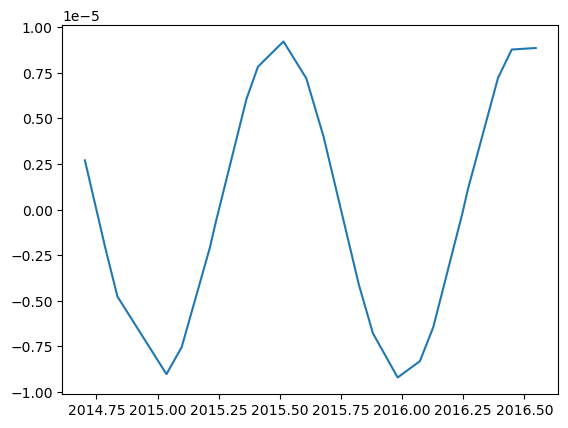

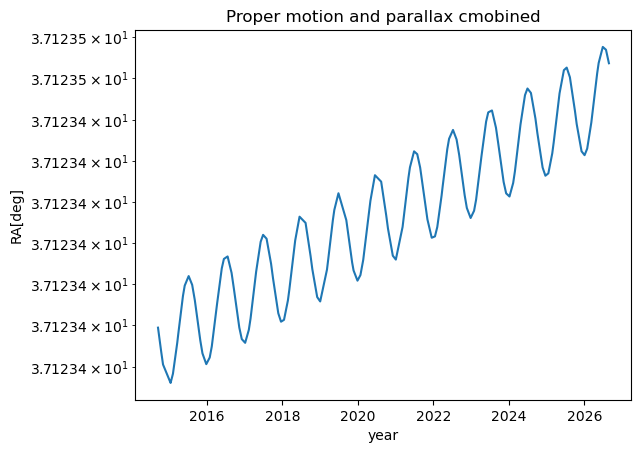

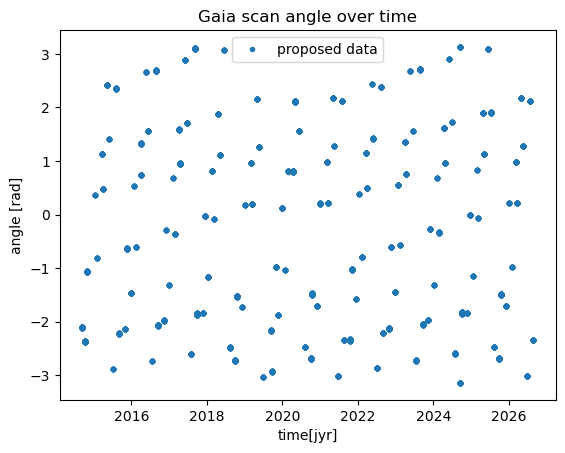

In [5]:
%run Init_exoplanet_fit_vers2.ipynb

In [5]:
masses = np.linspace(2,10,5) #generate mass interval for planets in Mjup
Aly=np.empty(len(masses),dtype=np.ndarray)
#task: do analysis for all masses and plot found mass against input mass

In [7]:
for i in range(len(masses)):
    Aly[i]=generate_model_data(input_p,input_ttrans,input_b,input_ecc,input_Rs,input_Ms,masses[i],input_omega,input_Omega,input_plx,gaia_scanAng_rad)

In [9]:
traces=np.empty(len(masses),dtype=np.ndarray)
for i in range (len(masses)):
    traces[i]=model_fit(input_p,input_ttrans,input_plx,gaia_t,gaia_scanAng_rad,Aly[i],gaia_error)


Output()

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
C:\Users\bernh\anaconda3\envs\gaiaproject\Lib\site-packages\pymc\step_methods\hmc\quadpotential.py:627: UserWarning: QuadPotentialFullAdapt is an experimental feature
  warnings.warn("QuadPotentialFullAdapt is an experimental feature")
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [period, ecc, tperi, __plus_angle1, __plus_angle2, __minus_angle1, __minus_angle2, cos_incl, Mstar, Rstar, logmpl, ra, dec]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 33 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Output()

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
C:\Users\bernh\anaconda3\envs\gaiaproject\Lib\site-packages\pymc\step_methods\hmc\quadpotential.py:627: UserWarning: QuadPotentialFullAdapt is an experimental feature
  warnings.warn("QuadPotentialFullAdapt is an experimental feature")
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [period, ecc, tperi, __plus_angle1, __plus_angle2, __minus_angle1, __minus_angle2, cos_incl, Mstar, Rstar, logmpl, ra, dec]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 42 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Output()

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
C:\Users\bernh\anaconda3\envs\gaiaproject\Lib\site-packages\pymc\step_methods\hmc\quadpotential.py:627: UserWarning: QuadPotentialFullAdapt is an experimental feature
  warnings.warn("QuadPotentialFullAdapt is an experimental feature")
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [period, ecc, tperi, __plus_angle1, __plus_angle2, __minus_angle1, __minus_angle2, cos_incl, Mstar, Rstar, logmpl, ra, dec]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 34 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Output()

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
C:\Users\bernh\anaconda3\envs\gaiaproject\Lib\site-packages\pymc\step_methods\hmc\quadpotential.py:627: UserWarning: QuadPotentialFullAdapt is an experimental feature
  warnings.warn("QuadPotentialFullAdapt is an experimental feature")
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [period, ecc, tperi, __plus_angle1, __plus_angle2, __minus_angle1, __minus_angle2, cos_incl, Mstar, Rstar, logmpl, ra, dec]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 31 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


Output()

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_full...
C:\Users\bernh\anaconda3\envs\gaiaproject\Lib\site-packages\pymc\step_methods\hmc\quadpotential.py:627: UserWarning: QuadPotentialFullAdapt is an experimental feature
  warnings.warn("QuadPotentialFullAdapt is an experimental feature")
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [period, ecc, tperi, __plus_angle1, __plus_angle2, __minus_angle1, __minus_angle2, cos_incl, Mstar, Rstar, logmpl, ra, dec]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 31 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


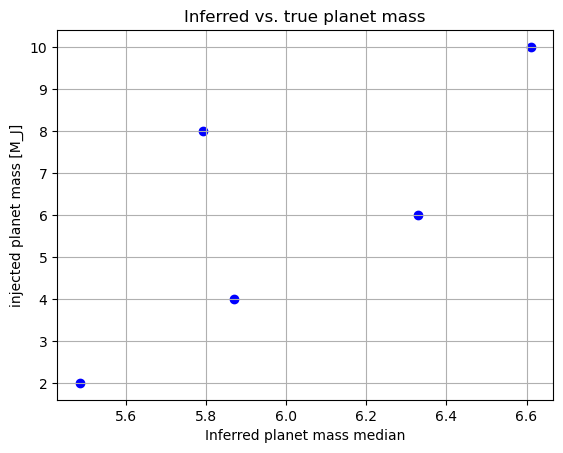

In [23]:
for i in range(len(traces)):
    plt.scatter(np.percentile(traces[i].posterior["mpl"],50),masses[i],color='b')
plt.xlabel("Inferred planet mass median")
plt.ylabel("injected planet mass [M_J]")
plt.title("Inferred vs. true planet mass")
plt.grid()

In [35]:
#now plot the SNR from the injection model
_mjuptomsun=1/1000 #simplified conversion to solar masses

signal=astrometric_signal(masses*_mjuptomsun,input_Ms,semimajax(input_p),init_dist)
res=SNR(signal,gaia_error)

In [23]:

gaia_epoch_ra=2015.5
central_ra=Angle(RA_deg,unit='deg')
central_dec=Angle(DEC_deg,unit='deg')
parallax=Angle(input_plx,unit='mas') #already in marcsec
pmra=500*u.mas/u.yr #propoer motion marcsec/yr
pmdec=500*u.mas/u.yr

gaia_epochs = gaia_t
#jyear_epochs_fine = np.linspace(np.min(gaia_epochs.jyear), np.max(gaia_epochs.jyear), 10000)
jyear_epochs_fine=gaia_t.jyear
#print(len(jyear_epochs_fine))
#year_epochs_fine = jyear_epochs_fine - Time(gaia_epoch_ra, format='decimalyear').jyear
year_epochs_fine=jyear_epochs_fine -Time(2015.5,format="jyear").jyear

ra_comparison = 0
dec_comparison = 0

plx_factor_ra_fine, plx_factor_dec_fine = parallactic_motion(jyear_epochs_fine, central_ra.mas, central_dec.mas, 
                                                             'mas', gaia_epoch_ra, ephemeris=earth_sun_l2_ephemeris)

ra_comparison = Angle(plx_factor_ra_fine * parallax.to(u.mas).value + pmra.to(u.mas/u.yr).value  * year_epochs_fine, unit='mas')
dec_comparison = Angle(plx_factor_dec_fine * parallax.to(u.mas).value  + pmdec.to(u.mas/u.yr).value  * year_epochs_fine, unit='mas')
dec_comparison += central_dec
# these ra and dec are really ra * cos(dec), so we need to remove the 1/cos(dec) factor.
ra_comparison /= np.cos(dec_comparison.to(u.rad).value)
#
ra_comparison += central_ra

# convert to degrees
ra_comparison = ra_comparison.to(u.deg)
dec_comparison = dec_comparison.to(u.deg)

In [127]:
parallactic_motion?

Signature:
parallactic_motion(
    epochs,
    cntr_ra,
    cntr_dec,
    unit,
    refepoch,
    ephemeris=<function earth_ephemeris at 0x00000148AEA66C00>,
    parallax=1,
)
Docstring:
:param epochs: array of times in Julian year. Use astropy.time.Time.jyear to convert outside of this.
:param cntr_ra: right ascension coordinate about which to calculate the parallactic motion. Should be in
                the appropriate form for having units of unit.
:param cntr_dec: declination coordinate about which to calculate the parallactic motion. Should be in
                the appropriate form for having units of unit.
:param unit: from Astropy.unit. Must be such that astropy.coordinates.Angle(cntr_ra, unit=unit) is sensical.
:param refepoch: reference epoch in julian year.
:param parallax: float. The parallax angle in milli-arcseconds.
:param ephemeris: function.
      Function which intakes an array of Julian years and returns an array of shape (3,t.size)
      with the xyz components of 

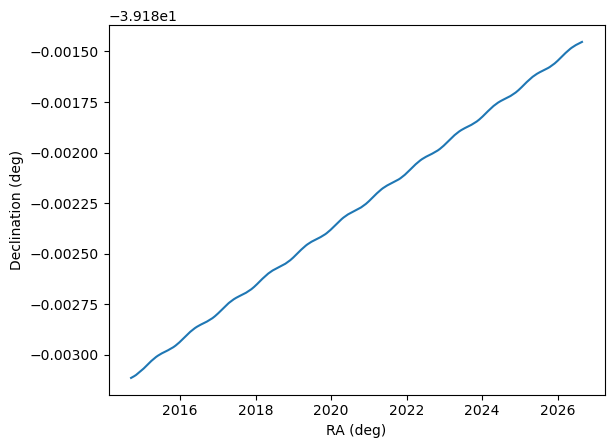

In [125]:
plt.plot(gaia_t.jyear, dec_comparison)
plt.ylabel('Declination (deg)')
plt.xlabel('RA (deg)')
plt.show()

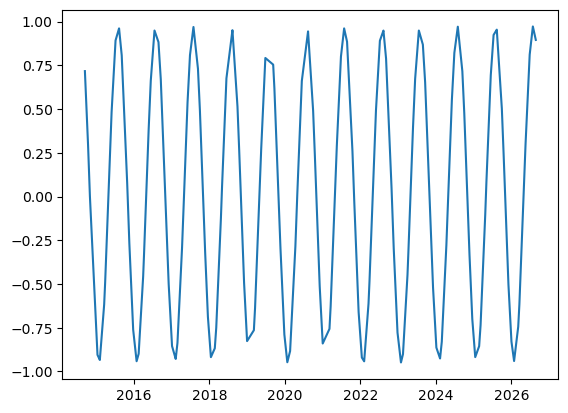

In [29]:
"""
Here: only parallactic motion
"""
cntr_ra, cntr_dec = Angle(RA_deg, 'degree'), Angle(DEC_deg, 'degree')
plx =input_plx* u.mas # fake parallax

# generate the parallactic perturbations. 
# Gaia is at L2. 
jyear_epoch = gaia_t.jyear
# pick a central epoch for the fit:
central_epoch = 2015.5
#gives back parallactic motion around the central coordinates
ra_motion, dec_motion = parallactic_motion(jyear_epoch, cntr_ra.degree, cntr_dec.degree, 'degree',
                                           Time(central_epoch, format='decimalyear', scale='tcb').jyear,
                                           ephemeris=earth_sun_l2_ephemeris)
# ra_motion, dec_motion are the parallax motion alone, for a parallax of 1 mas. I.e., the parallax factors.
# note that ra_motion and dec_motion are in degrees here.
# generate sky path
year_epochs = jyear_epoch - Time(central_epoch, format='jyear', scale='tcb').jyear
# add a small linear motion (fake proper motion of beta pic) of 5 mas/yr in ra and .1 mas/yr in dec
ra = Angle(.5 * year_epochs, unit='mas') + Angle(ra_motion, unit='degree') * plx.value
dec = Angle(.1 * year_epochs, unit='mas') + Angle(dec_motion, unit='degree') * plx.value

# for large proper motions, ideally you will want to fit iteratively, because there are small numerical round offs
# that add up.

m=1000*3600
plt.figure()
plt.plot(gaia_t.jyear, m*ra_motion)


In [31]:
ra_motion

array([1.99269684e-07, 1.99269474e-07, 1.99269301e-07, ...,
       2.48792898e-07, 2.48792796e-07, 2.48792695e-07])

In [33]:
parallactic_motion?

Signature:
parallactic_motion(
    epochs,
    cntr_ra,
    cntr_dec,
    unit,
    refepoch,
    ephemeris=<function earth_ephemeris at 0x0000015409836DE0>,
    parallax=1,
)
Docstring:
:param epochs: array of times in Julian year. Use astropy.time.Time.jyear to convert outside of this.
:param cntr_ra: right ascension coordinate about which to calculate the parallactic motion. Should be in
                the appropriate form for having units of unit.
:param cntr_dec: declination coordinate about which to calculate the parallactic motion. Should be in
                the appropriate form for having units of unit.
:param unit: from Astropy.unit. Must be such that astropy.coordinates.Angle(cntr_ra, unit=unit) is sensical.
:param refepoch: reference epoch in julian year.
:param parallax: float. The parallax angle in milli-arcseconds.
:param ephemeris: function.
      Function which intakes an array of Julian years and returns an array of shape (3,t.size)
      with the xyz components of 

In [35]:
#can use astrometry as object, must find way to somehow  get parallactic motion and include gaia scanning angles
"""
this code helps to implement the pm, evtl we can just take the AL_parallax factors instead of the ones calculated to account for the shifts
NOTE: we only have 1 parallax factor for AL, but this is all that needed as we only interested in AL-direction shift, but to mak eit interesting, try to do
it anyway via transformation

finally: do not forget to chekc whether we egt ra or ra cos(dec)!
TODO: Implement function to take all the gathered functions and add them to the motion of the planet
        do that and then try to see what it does
        test more masses and repeatedly
        take a look at SNR(seems oddly low)
        check access of EUler cluster
"""

'\nthis code helps to implement the pm, evtl we can just take the AL_parallax factors instead of the ones calculated to account for the shifts\nNOTE: we only have 1 parallax factor for AL, but this is all that needed as we only interested in AL-direction shift, but to mak eit interesting, try to do\nit anyway via transformation\n\nfinally: do not forget to chekc whether we egt ra or ra cos(dec)!\nTODO: Implement function to take all the gathered functions and add them to the motion of the planet\n        Notify Hugh whether we can transfrom the parallax factors with just a coordinate transfromation\n        do that and then try to see what it does\n        test more masses and repeatedly\n        take a look at SNR(seems oddly low)\n        check access of EUler cluster\n'

In [43]:
pmra=0*u.mas/u.yr #propoer motion marcsec/yr
pmdec=0*u.mas/u.yr

ra_plx_factor = gaia_ALplxfact*np.cos(gaia_scanAng_rad.astype(float))-gaia_ACplxfact*np.sin(gaia_scanAng_rad.astype(float))
dec_plx_factor = gaia_ALplxfact*np.sin(gaia_scanAng_rad.astype(float))+gaia_ACplxfact*np.cos(gaia_scanAng_rad.astype(float))

ra = Angle(ra_plx_factor * parallax.to(u.mas).value + pmra.to(u.mas/u.yr).value  * year_epochs, unit='mas')
dec = Angle(dec_plx_factor * parallax.to(u.mas).value  + pmdec.to(u.mas/u.yr).value  * year_epochs, unit='mas')
dec += central_dec

# these ra and dec are really ra * cos(dec), so we need to remove the 1/cos(dec) factor.
ra /= np.cos(dec.to(u.rad).value)
# then add in the central ra.
ra += central_ra
# convert to degrees
ra = ra.to(u.deg)
dec = dec.to(u.deg)

#Astrometry?

Text(0, 0.5, 'DEC')

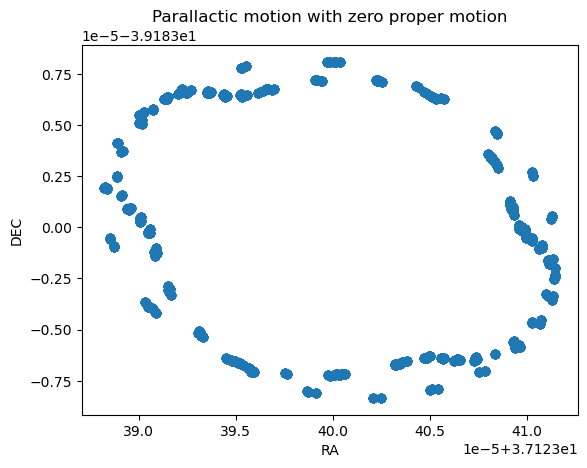

In [55]:

plt.figure()
plt.scatter(ra,dec)
plt.title("Parallactic motion with zero proper motion")
plt.xlabel("RA")
plt.ylabel("DEC")

Text(0, 0.5, 'DEC')

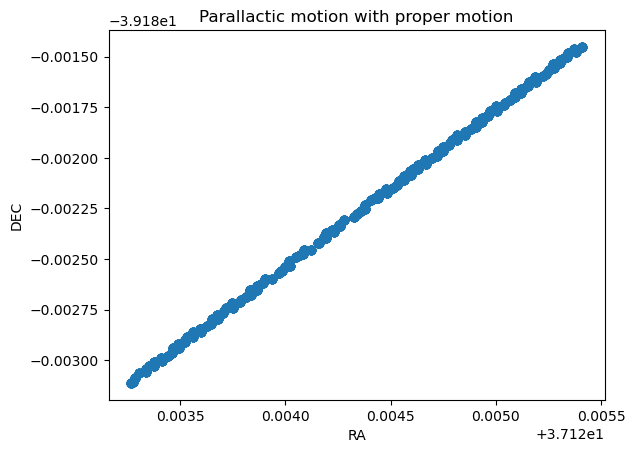

In [57]:
pmra=500*u.mas/u.yr #propoer motion marcsec/yr
pmdec=500*u.mas/u.yr

ra_plx_factor = gaia_ALplxfact*np.cos(gaia_scanAng_rad.astype(float))-gaia_ACplxfact*np.sin(gaia_scanAng_rad.astype(float))
dec_plx_factor = gaia_ALplxfact*np.sin(gaia_scanAng_rad.astype(float))+gaia_ACplxfact*np.cos(gaia_scanAng_rad.astype(float))

ra = Angle(ra_plx_factor * parallax.to(u.mas).value + pmra.to(u.mas/u.yr).value  * year_epochs, unit='mas')
dec = Angle(dec_plx_factor * parallax.to(u.mas).value  + pmdec.to(u.mas/u.yr).value  * year_epochs, unit='mas')
dec += central_dec

# these ra and dec are really ra * cos(dec), so we need to remove the 1/cos(dec) factor.
ra /= np.cos(dec.to(u.rad).value)
# then add in the central ra.
ra += central_ra
# convert to degrees
ra = ra.to(u.deg)
dec = dec.to(u.deg)

plt.figure()
plt.scatter(ra,dec)
plt.title("Parallactic motion with proper motion")
plt.xlabel("RA")
plt.ylabel("DEC")